In [44]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
from data.data import SphericalDataset, SphericalBlockDataset, stand_norm
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from cfg.configs import Config
from util.utils import count_parameters
from network.network import MLP
%load_ext autoreload
%autoreload 2

config = Config("nn_block.yaml")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
ds = SphericalDataset(**config.get_dataset_param())
coords = ds.coords[..., :3].reshape(-1, 3)

In [15]:
print(ds.coords.shape[:-1])
for length in ds.coords.shape[:-1]:
  print(length / 8)

(201, 360, 160)
25.125
45.0
20.0


In [ ]:
blocks = []

In [68]:
downscale = 8
dim_chunks = [np.arange(0, length+1, length//downscale) for length in ds.coords.shape[:-1]]

In [69]:
dim_chunks

[array([  0,  25,  50,  75, 100, 125, 150, 175, 200]),
 array([  0,  45,  90, 135, 180, 225, 270, 315, 360]),
 array([  0,  20,  40,  60,  80, 100, 120, 140, 160])]

In [65]:
1771/3

590.3333333333334

In [56]:
ds.coords.shape

(201, 360, 160, 6)

In [75]:
a = [(2,2), (3,3)]

In [77]:
for i, (j, k) in enumerate(a):
  print(i,j,k)

0 2 2
1 3 3


In [78]:
len(coords_block)

512

In [73]:
for b in coords_block:
  print(b.shape)

(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45, 20, 6)
(25, 45,

In [109]:
dsprev = SphericalDataset(**config.get_dataset_param(), intrans=None, outtrans=None)

In [110]:
dsprev.curv = stand_norm(dsprev.curv)

In [111]:
transcd = ds.outpp.transform(coords)

In [112]:
display(transcd[:5], dsprev.curv[:5])

array([[ 0.09401977, -1.        , -0.94650984],
       [ 0.09401977, -1.        , -0.9468272 ],
       [ 0.09401977, -1.        , -0.9471446 ],
       [ 0.09401977, -1.        , -0.94746196],
       [ 0.09401977, -1.        , -0.94777966]], dtype=float32)

tensor([[ 0.0940, -1.0000, -0.9465],
        [ 0.0940, -1.0000, -0.9468],
        [ 0.0940, -1.0000, -0.9471],
        [ 0.0940, -1.0000, -0.9475],
        [ 0.0940, -1.0000, -0.9478]])

In [113]:
ds.outpp.inverse_transform(transcd[:5])

array([[3.4850000e+03, 4.8780406e-05, 1.7039299e+02],
       [3.4850000e+03, 4.8780406e-05, 1.6938213e+02],
       [3.4850000e+03, 4.8780406e-05, 1.6837077e+02],
       [3.4850000e+03, 4.8780406e-05, 1.6736003e+02],
       [3.4850000e+03, 4.8780406e-05, 1.6634795e+02]], dtype=float32)

In [116]:
coords[:5]

array([[3485.   ,    0.   ,  170.393],
       [3485.   ,    0.   ,  169.382],
       [3485.   ,    0.   ,  168.371],
       [3485.   ,    0.   ,  167.36 ],
       [3485.   ,    0.   ,  166.348]], dtype=float32)

In [103]:
ds.curv[:5]

tensor([[ 0.0940, -1.0000, -0.9465],
        [ 0.0940, -1.0000, -0.9468],
        [ 0.0940, -1.0000, -0.9471],
        [ 0.0940, -1.0000, -0.9475],
        [ 0.0940, -1.0000, -0.9478]])

In [117]:
curv_gt = np.load("eval/data/gt_nopole.npy")
curv_pred = np.load("eval/data/pred_nopole.npy")

In [118]:

curv_gt.shape

(11577600, 3)

In [119]:
coords.shape

(11577600, 3)

In [62]:
ds.coords[...,:3].reshape(-1, 3)[:5]

tensor([[3485.0000,    0.0000,  170.3930],
        [3485.0000,    0.0000,  169.3820],
        [3485.0000,    0.0000,  168.3710],
        [3485.0000,    0.0000,  167.3600],
        [3485.0000,    0.0000,  166.3480]])

In [58]:
curv_gt[:5]

array([[3484.9998 ,    0.     ,  170.393  ],
       [3484.9998 ,    0.     ,  169.38202],
       [3484.9998 ,    0.     ,  168.371  ],
       [3484.9998 ,    0.     ,  167.36   ],
       [3484.9998 ,    0.     ,  166.34799]], dtype=float32)

In [60]:
curv_pred[:5]

array([[5080.262   ,   11.569483,   13.928986],
       [5080.851   ,   10.589554,   13.883995],
       [5080.7437  ,   11.071011,   13.865015],
       [5077.89    ,   10.84445 ,   13.841349],
       [5080.5234  ,   11.245075,   13.824697]], dtype=float32)

In [81]:
std.fit(np.ones(10))

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [46]:
mycurv = ds.outpp.inverse_transform(ds.curv)

In [19]:
std.fit(axis=1)

TypeError: fit() got an unexpected keyword argument 'axis'

In [25]:
a = np.array([0,1])
b = np.array([2,3])

In [26]:
tmp = a
a = b
b = tmp

In [28]:
a

array([2, 3])

In [3]:
traj_down = np.load("data/down2/trajectories.npy")
traj_len_down = np.load("data/down2/tra_len.npy")

In [31]:
a = np.zeros((2, 256, 4))
b = np.zeros((2, 200, 4))
npad = np.zeros((2, 56, 4))

In [33]:
npad = np.zeros((2, 56, 4))
np.concatenate((b, npad), axis=1).shape

(2, 256, 4)

In [20]:
np.concatenate((a, b), axis=0, pad)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 256 and the array at index 1 has size 200

In [18]:
np.arange(1, 10, 1)[:,None].shape

(9, 1)

In [13]:
np.repeat(a[None, :, 0, :], 5, 0).shape

(5, 2, 4)

In [6]:
traj_len_down[rand_idx[:10]]

array([1320, 1100, 2001, 1988, 2001, 1487, 1822, 2001, 2001, 2001],
      dtype=int32)

In [7]:
traj_down[rand_idx[:10],]

TypeError: only integer scalar arrays can be converted to a scalar index

In [4]:
rand_idx = torch.randperm(len(traj_down))

In [2]:
traj = np.load("data/gt/trajectories.npy")

In [3]:
traj_len = np.load("data/gt/tra_len.npy")

In [123]:
traj_sm_len = np.load("data/down2/tra_len.npy")

In [18]:
class Test():
  def __init__(self, data, traj_len, in_idx, input_trans=normalization):
    self.timelen = traj_len
    self.input_trans = input_trans
    print(data.shape)
    self.input = torch.tensor(data[:, :, in_idx], dtype=torch.float32)
    # self.input_coord = torch.tensor(data[:, 0, in_idx], dtype=torch.float32)

    # if self.input_trans is not None:
    #   self.input = self.input_trans(self.input, dim=None)
      
    input_list = []
    target_list = []
    for i in trange(self.timelen.shape[0]):
      curr_pos = self.input[i, :(self.timelen[i]-1)]
      next_pos = self.input[i, 1:self.timelen[i]]
      delta = curr_pos - next_pos
      input_list.append(curr_pos)
      target_list.append(delta)

    self.input = torch.concat(input_list, dim=0)
    self.target = torch.concat(target_list, dim=0)

In [164]:
rand_idx = torch.randperm(traj.shape[0])

In [166]:
rand_idx = torch.randperm(traj.shape[0])
num_out = traj.shape[0]//2
np.save('data/down2/trajectories.npy', traj[rand_idx[:num_out]])
np.save('data/down2/tra_len.npy', traj_len[rand_idx[:num_out]])

(array([6.0000e+00, 7.7000e+01, 8.8200e+02, 1.9910e+03, 3.6240e+03,
        4.0470e+03, 3.8410e+03, 3.4200e+03, 3.0720e+03, 6.2314e+04]),
 array([ 186. ,  367.5,  549. ,  730.5,  912. , 1093.5, 1275. , 1456.5,
        1638. , 1819.5, 2001. ]),
 <BarContainer object of 10 artists>)

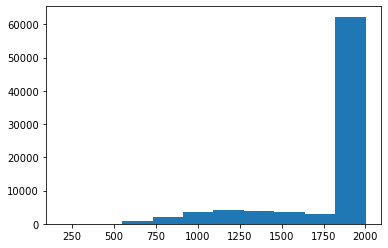

In [24]:
plt.hist(traj_len,bins=10)

In [34]:
torch.cat(())

TypeError: expected Tensor as element 0 in argument 0, but got list

In [37]:
i = torch.randint(0, 10, (1,))

In [40]:
i

tensor([6])

In [26]:
traj_len[traj_len >= 2000]

(59704,)

In [14]:
traj[0, range(traj_len[1])].shape

(1523, 6)